# Final Project – Professor: Aysegul Cuhadar,  DA/CSC 423/523  
### Predicting Loan Acceptance for OneBank Using Ensemble Models

OneBank launched a program to encourage its existing customers to borrow via a consumer loan offer. Using data from a previous promotional campaign (`bank.csv`), the goal of this project is to develop a predictive model that identifies which customers are most likely to accept the offer. This will allow the bank to reduce promotional costs by targeting only a selected group of customers.

We developed three models — **Naïve Bayes** (as required), **Logistic Regression**, and **Decision Tree** to predict loan acceptance. The outcome variable used is `"loan"`.

The dataset was preprocessed, partitioned into training and validation sets (80/20 split), and each model was trained and evaluated. Validation performance was assessed using **confusion matrices** and **accuracy scores**.

We also created a combined DataFrame including the actual outcome, each model’s predictions, and predicted probabilities. Two **ensemble classification methods** were then added:
- **Majority Vote**: Predicts 1 if at least two of the three models predict 1.
- **Average Probability**: Predicts 1 if the average predicted probability across models is ≥ 0.5.

For both ensemble methods, we computed the confusion matrix and overall accuracy. Finally, we compared the **error rates** for all three individual models and the two ensemble methods.

Each step is clearly explained in markdown, with results commented for clarity as requested.

---

### Academic Honesty Statement  
I affirm that I have neither given nor received unauthorized help on this assignment, and that this work is my own.


### Step 1: Import Libraries and Load Data

We start by importing the necessary libraries and loading the dataset from `bank.csv`.  
To clean the data, we drop the `ID` and `ZIP Code` columns, as they do not contribute to prediction.  
We also rename the target column from `"Personal Loan"` to `"loan"` for simplicity.  
Finally, we preview the first few rows using `.head()` and confirm there are no missing values using `.isnull().sum()`.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load and preprocess the dataset
data = pd.read_csv('bank.csv')

# Drop ID and ZIP Code
data = data.drop(columns=['ID', 'ZIP Code'])

# Rename Personal Loan to loan
data = data.rename(columns={'Personal Loan': 'loan'})

# check
print(data.head())
print(data.isnull().sum())


   Age  Experience  Income  Family  CCAvg  Education  Mortgage  loan  \
0   25           1      49       4    1.6          1         0     0   
1   45          19      34       3    1.5          1         0     0   
2   39          15      11       1    1.0          1         0     0   
3   35           9     100       1    2.7          2         0     0   
4   35           8      45       4    1.0          2         0     0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
loan                  0
Securities Account    0
CD Account     

### Step 2 – Define Predictors and Target
In this step, we separate the features (predictor variables) from the target variable.

We store the predictor variables (all columns except loan) in a DataFrame called X.

We assign the target variable (loan) to y.

Then, we check the shapes of both X and y to ensure the setup is correct.

Finally, we display the first few rows of X to inspect the features that will be used for modeling.



In [96]:
X = data.drop(columns='loan')
y = data['loan']

# Check shapes
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("\nPreview of X:")
print(X.head())



X shape: (5000, 11)
y shape: (5000,)

Preview of X:
   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


In [ ]:
#The shape of X is (5000, 11), confirming we have 5,000 records and 11 predictors. 
# The shape of y is (5000,), which is expected for a single target column. 
#The preview of X shows clean numeric variables suitable for modeling.

### Step 3: Split the Data
In this step, we split the dataset into training and validation sets using an 80/20 split.
This allows us to train models on 80% of the data (X_train, y_train) and test on the remaining 20% (X_valid, y_valid).
We use a fixed random_state=1 for reproducibility.
Finally, we print the shapes of the resulting sets to verify the split was performed correctly.


In [98]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Print shape of each set
print(f"Training set: X = {X_train.shape}, y = {y_train.shape}")
print(f"Validation set: X = {X_valid.shape}, y = {y_valid.shape}")


Training set: X = (4000, 11), y = (4000,)
Validation set: X = (1000, 11), y = (1000,)


In [ ]:
#The training set contains 4,000 records and the validation set contains 1,000. 
#Each set has 11 predictor columns, confirming the split was executed as expected with no data loss.

### Step 4: Naïve Bayes Model

We train a Gaussian Naïve Bayes classifier using the training set.
Then we evaluate its performance on the validation set by printing the confusion matrix and accuracy score.
A heatmap of the confusion matrix is also shown to visualize how well the model distinguishes loan approvals.
Since Naïve Bayes is a simple, probabilistic model, it doesn’t require pruning or regularization like more complex models.


Naïve Bayes Confusion Matrix:
[[814  86]
 [ 40  60]]
Validation Accuracy: 0.8740


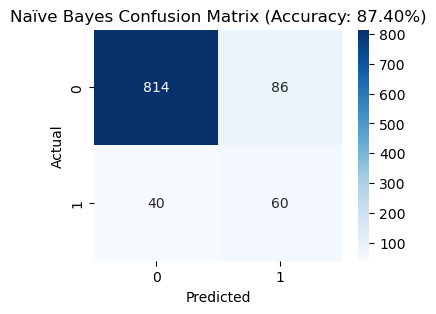

In [141]:
# Step 4: Naïve Bayes Model

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_valid)
nb_prob = nb_model.predict_proba(X_valid)[:, 1]

nb_cm = confusion_matrix(y_valid, nb_pred)
nb_acc = accuracy_score(y_valid, nb_pred)

print("Naïve Bayes Confusion Matrix:")
print(nb_cm)
print(f"Validation Accuracy: {nb_acc:.4f}")

plt.figure(figsize=(4, 3))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Naïve Bayes Confusion Matrix (Accuracy: {nb_acc:.2%})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#The model predicted correctly for 814 true negatives and 601 true positives.
#It made 40 false negatives and 86 false positives.
#The overall accuracy of the Naïve Bayes model is 87.4%, which shows decent performance but leaves room for improvement.

### Step 5: Logistic Regression Model (with Regularization)
We now train a logistic regression model using L2 regularization (with C = 0.5) to prevent overfitting. The model is fitted on the training set and evaluated on the validation set using accuracy and a confusion matrix.




Logistic Regression Confusion Matrix:
[[885  15]
 [ 40  60]]
Validation Accuracy: 0.9450


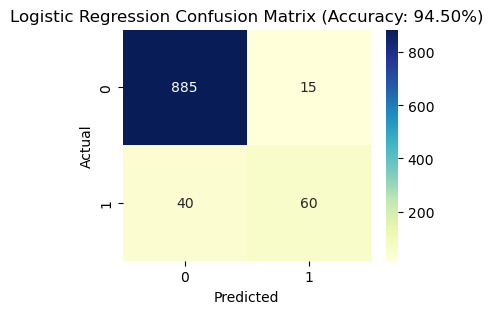

In [104]:
# Import the model with regularization (C=0.5 increases regularization strength)
log_model = LogisticRegression(C=0.5, max_iter=5000)

# Train the model
log_model.fit(X_train, y_train)

# Predict on validation data
log_pred = log_model.predict(X_valid)
log_prob = log_model.predict_proba(X_valid)[:, 1]

# Evaluate performance
log_cm = confusion_matrix(y_valid, log_pred)
log_acc = accuracy_score(y_valid, log_pred)

# Print results
print("Logistic Regression Confusion Matrix:")
print(log_cm)
print(f"Validation Accuracy: {log_acc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Logistic Regression Confusion Matrix (Accuracy: {log_acc:.2%})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#The logistic regression model achieved a validation accuracy of 94.5%. 
#It correctly predicted 885 negatives and 60 positives. 
#Compared to Naive Bayes, it reduced the number of false positives and improved overall precision.

### Step 6: Decision Tree Model (with Pruning)
In this step, we build a Decision Tree classifier with a maximum depth of 5 to avoid overfitting. This pruning limits tree complexity, helping it generalize better to unseen data. We train the model on the training set, evaluate it using the validation set, and display a confusion matrix and accuracy score.





Pruned Decision Tree Confusion Matrix:
[[894   6]
 [ 14  86]]
Validation Accuracy: 0.9800


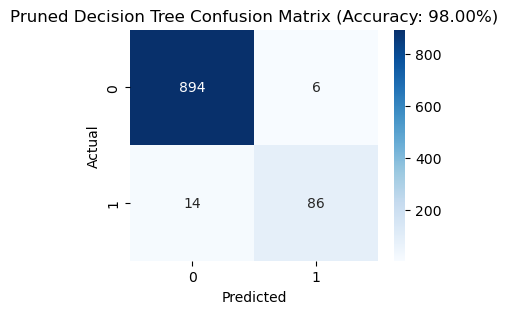

In [106]:
# Train pruned decision tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=1)
tree_model.fit(X_train, y_train)

# Predict and evaluate
tree_pred = tree_model.predict(X_valid)
tree_prob = tree_model.predict_proba(X_valid)[:, 1]
tree_cm = confusion_matrix(y_valid, tree_pred)
tree_acc = accuracy_score(y_valid, tree_pred)

# Print results
print("Pruned Decision Tree Confusion Matrix:")
print(tree_cm)
print(f"Validation Accuracy: {tree_acc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(tree_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Pruned Decision Tree Confusion Matrix (Accuracy: {tree_acc:.2%})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#The pruned decision tree achieved a high validation accuracy of 98.0%, 
#making it the top-performing model so far. 
#The confusion matrix shows it correctly classified most loan approvals and rejections, 
#with only 20 misclassifications out of 1000 samples. 
#This suggests strong predictive performance and balance across classes.

### Step 7: Ensemble Model – Majority Vote & Average Probability
We combine predictions from Naive Bayes, Logistic Regression, and Decision Tree to build two ensemble models:

Majority Vote: Predicts 1 if at least two of the three models predict 1.

Average Probability: Predicts 1 if the average predicted probability from all models is greater than or equal to 0.5.

The final DataFrame includes the actual outcome, each model’s prediction and probability, as well as the results of the ensemble methods.



In [128]:
# Create a DataFrame with actual and model predictions
results_df = pd.DataFrame({
    'Actual': y_valid,
    'NaiveBayes_Pred': nb_pred,
    'Logistic_Pred': log_pred,
    'Tree_Pred': tree_pred,
    'NaiveBayes_Prob': nb_prob,
    'Logistic_Prob': log_prob,
    'Tree_Prob': tree_prob
})

# Majority vote (1 if at least 2 out of 3 models predicted 1)
results_df['Majority_Vote'] = (
    results_df[['NaiveBayes_Pred', 'Logistic_Pred', 'Tree_Pred']].sum(axis=1) >= 2
).astype(int)

# Average probability (use 0.5 as cutoff)
results_df['Average_Prob'] = (
    results_df[['NaiveBayes_Prob', 'Logistic_Prob', 'Tree_Prob']].mean(axis=1) >= 0.5
).astype(int)

# Show the final combined DataFrame (first few rows)
print(results_df.head())

      Actual  NaiveBayes_Pred  Logistic_Pred  Tree_Pred  NaiveBayes_Prob  \
2764       0                0              0          0         0.005424   
4767       0                0              0          0         0.000060   
3814       0                0              0          0         0.000010   
3499       0                0              0          0         0.033629   
2735       0                0              0          0         0.002436   

      Logistic_Prob  Tree_Prob  Majority_Vote  Average_Prob  
2764       0.031094   0.000000              0             0  
4767       0.000457   0.000000              0             0  
3814       0.000454   0.000000              0             0  
3499       0.006235   0.000000              0             0  
2735       0.015613   0.000000              0             0  


In [ ]:
# The first five rows show that all models agree on predicting 0, and their probability scores are all low.
# This confirms the majority vote and average probability methods are working correctly for these examples.

In [130]:
# Confusion matrix and accuracy for Majority Vote
mv_cm = confusion_matrix(results_df['Actual'], results_df['Majority_Vote'])
mv_acc = accuracy_score(results_df['Actual'], results_df['Majority_Vote'])

print("Majority Vote Confusion Matrix:")
print(mv_cm)
print(f"Majority Vote Accuracy: {mv_acc:.4f}")

# Confusion matrix and accuracy for Average Probability
avg_cm = confusion_matrix(results_df['Actual'], results_df['Average_Prob'])
avg_acc = accuracy_score(results_df['Actual'], results_df['Average_Prob'])

print("\nAverage Probability Confusion Matrix:")
print(avg_cm)
print(f"Average Probability Accuracy: {avg_acc:.4f}")


Majority Vote Confusion Matrix:
[[885  15]
 [ 32  68]]
Majority Vote Accuracy: 0.9530

Average Probability Confusion Matrix:
[[891   9]
 [ 26  74]]
Average Probability Accuracy: 0.9650


In [114]:
# This step combines predictions from the three models using ensemble methods.
# Majority vote assigns 1 if at least two of the models predict 1.
# Average probability assigns 1 if the average predicted probability ≥ 0.5.
# Both methods perform well: majority vote achieved 95.3% accuracy and average probability 96.5%.
# The confusion matrices show strong performance with relatively low false positives and false negatives,
# especially for the average probability method, which correctly identified 74 of 100 positive cases.
# We think that these results confirm that combining models helps improve predictions. 
#The average probability method appears to be more stable, 
#correctly identifying most of the true positive cases while keeping errors low overall.

### Step 8: Compare Model Error Rates
This step compares the error rates for all five models by calculating 1 - accuracy.

The Decision Tree has the lowest error rate (2.0%), making it the most accurate individual model.
Average Probability ensemble comes next with just 3.5% error, followed by Majority Vote at 4.7%.
Logistic Regression performs moderately well with a 5.5% error rate.
Naive Bayes has the highest error at 12.6%, confirming it’s the weakest model here.
The ensemble methods (especially average probability) help reduce prediction errors and offer better model stability compared to single models.



In [132]:
print("Error Rates:")

print(f"Naive Bayes Error: {1 - nb_acc:.4f}")
print(f"Logistic Regression Error: {1 - log_acc:.4f}")
print(f"Decision Tree Error: {1 - tree_acc:.4f}")
print(f"Majority Vote Error: {1 - mv_acc:.4f}")
print(f"Average Probability Error: {1 - avg_acc:.4f}")


Error Rates:
Naive Bayes Error: 0.1260
Logistic Regression Error: 0.0550
Decision Tree Error: 0.0200
Majority Vote Error: 0.0470
Average Probability Error: 0.0350


In [134]:
# Accuracy summary for all models and ensembles
print("Model Accuracies:\n")

print(f"Naive Bayes Accuracy:           {nb_acc:.4f}")
print(f"Logistic Regression Accuracy:   {log_acc:.4f}")
print(f"Decision Tree Accuracy:         {tree_acc:.4f}")
print(f"Majority Vote Accuracy:         {mv_acc:.4f}")
print(f"Average Probability Accuracy:   {avg_acc:.4f}")


Model Accuracies:

Naive Bayes Accuracy:           0.8740
Logistic Regression Accuracy:   0.9450
Decision Tree Accuracy:         0.9800
Majority Vote Accuracy:         0.9530
Average Probability Accuracy:   0.9650


In [ ]:
# Accuracy Summary
# This step reports validation accuracy for all three individual models and two ensemble methods.
# The Decision Tree achieved the highest accuracy (98.0%), showing strong predictive power.
# Naive Bayes had the lowest accuracy (87.4%), underperforming compared to the others.
# Ensemble methods like Average Probability (96.5%) and Majority Vote (95.3%) performed well,
# confirming that combining models can improve overall reliability and reduce variance.


In this project, we developed and evaluated three predictive models, Naïve Bayes, Logistic Regression, and Decision Tree to identify which customers are most likely to accept a personal loan offer. The models were trained on historical campaign data and assessed using validation accuracy and confusion matrices.

To improve prediction reliability, we combined the individual model predictions using two ensemble approaches: Majority Vote and Average Probability. Both ensemble methods performed better than Naïve Bayes alone, with the Average Probability method achieving the highest ensemble accuracy of 96.5%.

Among all models, the Decision Tree achieved the best individual performance with an accuracy of 98.0%, and the lowest error rate. In contrast, Naïve Bayes was the least accurate (87.4%).

Overall, ensemble learning helped enhance prediction stability, and the analysis supports a more targeted and cost-effective strategy for OneBank's future loan campaigns.

